## Step 1: Install Required Libraries
First, you need to install the necessary Python libraries:

In [1]:
!pip install pandas requests nltk


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('data/es_DW.csv')
# Find rows where any column has None (or NaN) and print them
none_rows = df[df.isna().any(axis=1)]
print(none_rows)

        video_id                                        video_title  \
113  9WkpqBmT-L8  Gaza's floating pier to shut down, says US | D...   
206  nxLsbaczRh8  ICJ hears new case against Israel by South Afr...   
207  sz0O7_Ex2Po  Live: South Africa asks top UN court to stop I...   
208  GCth901nvCc  Israel's Rafah offensive puts relationship wit...   
232  4xC07O7_rE4  Pro-Palestinian protesters disrupt ceremony at...   
404  CIe-zNGaHEU  Germany calls on Israel to delay Rafah assault...   
414  Bxm9eB43iVc  Israeli raids have freed 3 hostages in 4 month...   
416  wMZaObPq9Wo  Netanyahu claims Rafah 'last bastion' of Hamas...   
418  PdUFGWWh6Uw  Germany’s Scholz in Washington for talks with ...   
419  _OYKHiy5MoA  Hamas reappearing in northern Gaza as Israel p...   
420  eZziwjKVn1E  Germany sends frigate to help secure Red Sea |...   
443  lM0F0gt2KUM  Joe Biden responds to attack that killed 3 US ...   
479  HGvbNkzk5P4  EU adds Hamas leader Sinwar to terrorist list ...   
488  t

In [4]:
# Drop rows where the transcript is NaN
df.dropna(subset=['transcript'], inplace=True)


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lorenz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

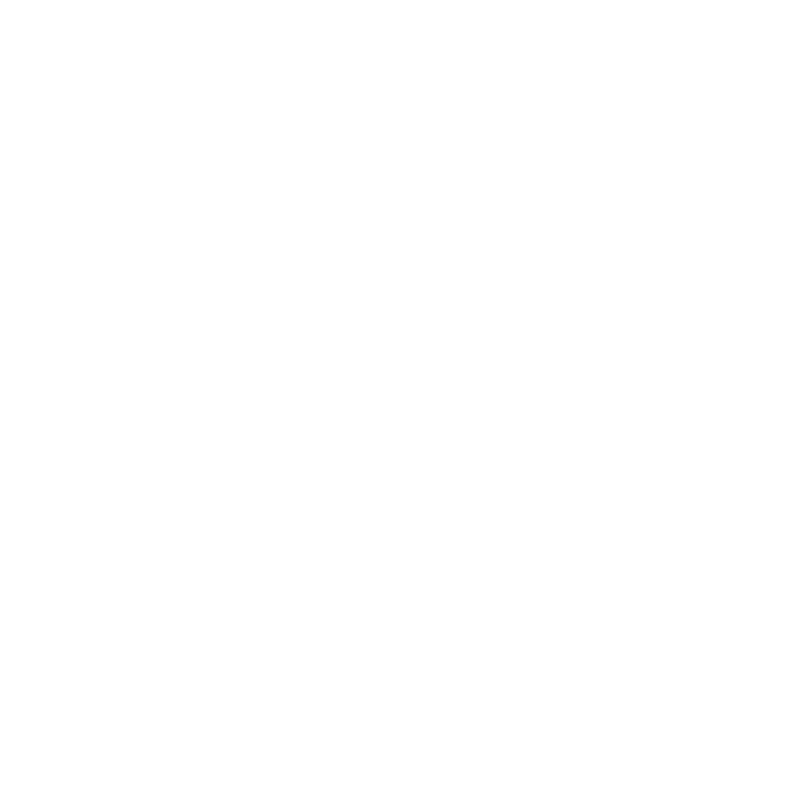

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.animation as animation
from nltk.corpus import stopwords
import re

# Load Spanish stopwords and add custom stopwords
spanish_stopwords = set(stopwords.words('spanish'))
custom_stopwords = {'eh'}
stopwords_set = spanish_stopwords.union(custom_stopwords)

# Function to replace specific words and group similar words
def preprocess_text(text):
    replacements = {
        r'\bJamás\b': 'Hamas',
        r'\bgasa\b': 'Gaza',
        r'\bIsrael\b': 'Israel',
        r'\bisraelí\b': 'Israel',
        r'\bisraelíes\b': 'Israel',
        r'\bisraelies\b': 'Israel'
    }
    for pattern, replacement in replacements.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
    return text

# Directory where the CSV file is saved
output_dir = 'data/es_DW/'
#csv_file = os.path.join(output_dir, 'youtube_dataset.csv')

# Load the data
#df = pd.read_csv(csv_file)

# Drop rows where the transcript is NaN
#df.dropna(subset=['transcript'], inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Sort data by publish date
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')
df.sort_values('publish_date', inplace=True)

# Create a directory to save individual word cloud images
wordcloud_dir = os.path.join(output_dir, 'wordclouds')
os.makedirs(wordcloud_dir, exist_ok=True)

#Create empty text string
text = ''

# Function to create a word cloud
def create_wordcloud(text, title, output_path):
    text = preprocess_text(text)
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords_set).generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.savefig(output_path, format='png')
    plt.close()

# Generate growing incremental word cloud images from each video
incr_dir = os.path.join(wordcloud_dir, 'incr')
os.makedirs(incr_dir, exist_ok=True)

for index, row in df.iterrows():
    title = row['video_title']
    text = text + row['transcript']
    output_path = os.path.join(incr_dir, f'{index}.png')
    create_wordcloud(text, title, output_path)
# Create an animation of the word clouds
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

def update(frame):
    img_path = os.path.join(wordcloud_dir, f'{frame}.png')
    img = plt.imread(img_path)
    ax.clear()
    ax.imshow(img)
    ax.axis('off')
    # ax.set_title(df.iloc[frame]['video_title'], fontsize=14)


MovieWriter imagemagick unavailable; using Pillow instead.


Word cloud animation created successfully and saved to youtube_output/wordcloud_animation.gif


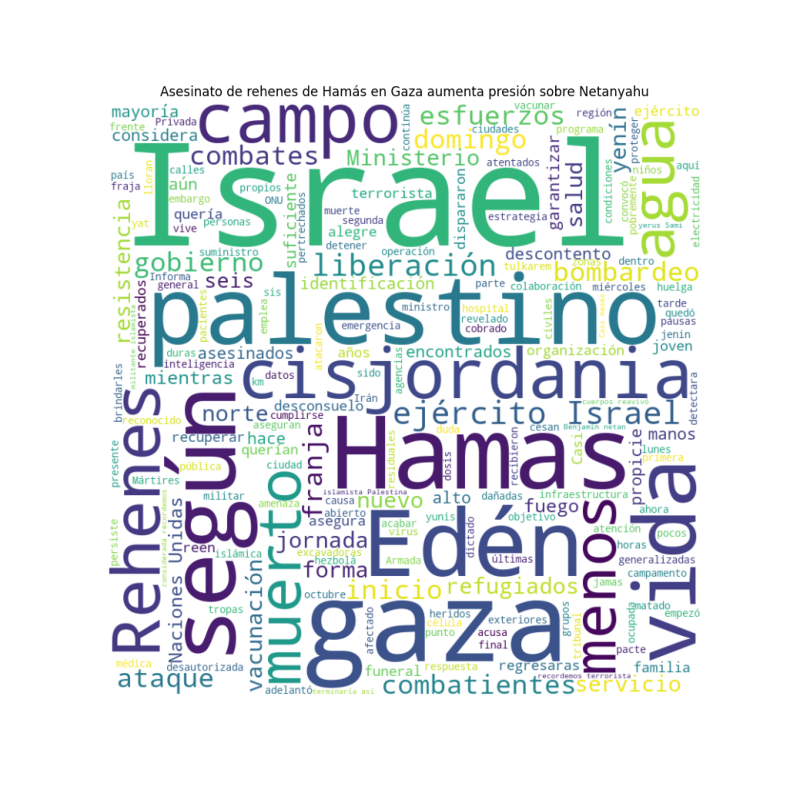

In [13]:
# Create an animation of the word clouds
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

def update(frame):
    img_path = os.path.join(wordcloud_dir, f'{frame}.png')
    img = plt.imread(img_path)
    ax.clear()
    ax.imshow(img)
    ax.axis('off')
    # ax.set_title(df.iloc[frame]['video_title'], fontsize=14)

ani = animation.FuncAnimation(fig, update, frames=len(df), repeat=True)

# Save the animation
ani.save(os.path.join(output_dir, 'wordcloud_animation.gif'), writer='imagemagick', fps=3)

print(f"Word cloud animation created successfully and saved to {output_dir}/wordcloud_animation.gif")